In [2]:
! jt -t grade3 -nf opensans

/bin/sh: jt: command not found


<h1><center>1. Load Data</center></h1>



In [1]:
import os
import json
import warnings
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
os.listdir('../synthesized-web/project_templates/templates/')

['price_paid_household.csv',
 'life-insurance.csv',
 'temp.csv',
 '.DS_Store',
 'epileptic-seizure.csv',
 'marketing-data_bank.csv',
 'prices_breakdown.csv',
 'marketing-data_ibm.csv',
 'credit.csv',
 'segmentation_analysis.csv',
 'homesite-quote-conversion.csv',
 'bank-loan-status-dataset.csv',
 'fire-peril.csv',
 'games.csv',
 'claim_prediction.csv',
 'churn_prediction.csv',
 'telecom-churn.csv',
 'PaySim1.csv',
 'diabetes.csv',
 'sales_pipeline.csv',
 'fraud_detection.csv',
 'fraud-time-series.csv',
 'air-quality.csv',
 'bank-churn.csv',
 'credit_card_default_prediction.csv',
 'noshowappointments.csv',
 'vehicle-insurance.csv',
 'businesses.csv']

In [3]:
datasets = [
    'price_paid_household.csv',
    'credit.csv',
    'claim_prediction.csv',
    'bank-loan-status-dataset.csv',
    'vehicle-insurance.csv'
]
datasets = [
    'vehicle-insurance.csv'
]

In [4]:
from sklearn.model_selection import train_test_split
from synthesized import HighDimSynthesizer
from synthesized.common.values import CategoricalValue, ContinuousValue, NanValue
from synthesized.testing import UtilityTesting

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3139-2D31-322D-B531
Expires at: 2019-12-31 00:00:00






<h1><center>Run experiments</center></h1>

In [ ]:
num_iterations = 15000

for dataset in datasets:    
    print('{} :: Running experimets for dataset {}'. format(datetime.now(), dataset))
    
    data = pd.read_csv('../synthesized-web/project_templates/templates/' + dataset)
    train, test = train_test_split(data, test_size=0.2, random_state=0)

    print('{} :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9'.format(datetime.now()))
    with HighDimSynthesizer(df=data, learning_rate=3e-4, decay_steps=1000, decay_rate=0.9) as synthesizer:
        synthesizer.learn(df_train=data, num_iterations=num_iterations)
        synthesized = synthesizer.synthesize(num_rows=len(data))

    testing = UtilityTesting(synthesizer, train, test, synthesized)
    testing.show_distribution_distances()
    testing.show_distributions(remove_outliers=0.01)
    testing.show_corr_distances()
    testing.show_corr_matrices()
    plt.show()

    print('{} :: learning_rate=1e-4, decay_steps=1000, decay_rate=0.9'.format(datetime.now()))
    with HighDimSynthesizer(df=data, learning_rate=1e-3, decay_steps=1000, decay_rate=0.9) as synthesizer:
        synthesizer.learn(df_train=data, num_iterations=num_iterations)
        synthesized = synthesizer.synthesize(num_rows=len(data))

    testing = UtilityTesting(synthesizer, train, test, synthesized)
    testing.show_distribution_distances()
    testing.show_distributions(remove_outliers=0.01)
    testing.show_corr_distances()
    testing.show_corr_matrices()
    plt.show()

    print('{} :: learning_rate=3e-4, decay_steps=None, decay_rate=None'.format(datetime.now()))
    with HighDimSynthesizer(df=data, learning_rate=3e-4, decay_steps=None, decay_rate=None) as synthesizer:
        synthesizer.learn(df_train=data, num_iterations=num_iterations)
        synthesized = synthesizer.synthesize(num_rows=len(data))

    testing = UtilityTesting(synthesizer, train, test, synthesized)
    testing.show_distribution_distances()
    testing.show_distributions(remove_outliers=0.01)
    testing.show_corr_distances()
    testing.show_corr_matrices()
    plt.show()
    
    print('{} :: Experimets for dataset {} finished'. format(datetime.now(), dataset))
    
    print('===========================================')

2019-10-15 10:36:21.895494 :: Running experimets for dataset vehicle-insurance.csv
2019-10-15 10:36:22.988604 :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2019-10-14 15:20:15.665817 :: Running experimets for dataset price_paid_household.csv
2019-10-14 15:20:15.878249 :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Average distance: 0.021582767978290354
Max distance: 0.06741044776119398
Average distance: 0.029778047116771927
Max distance: 0.029778047116771927


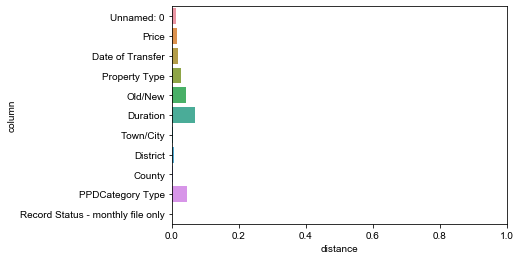

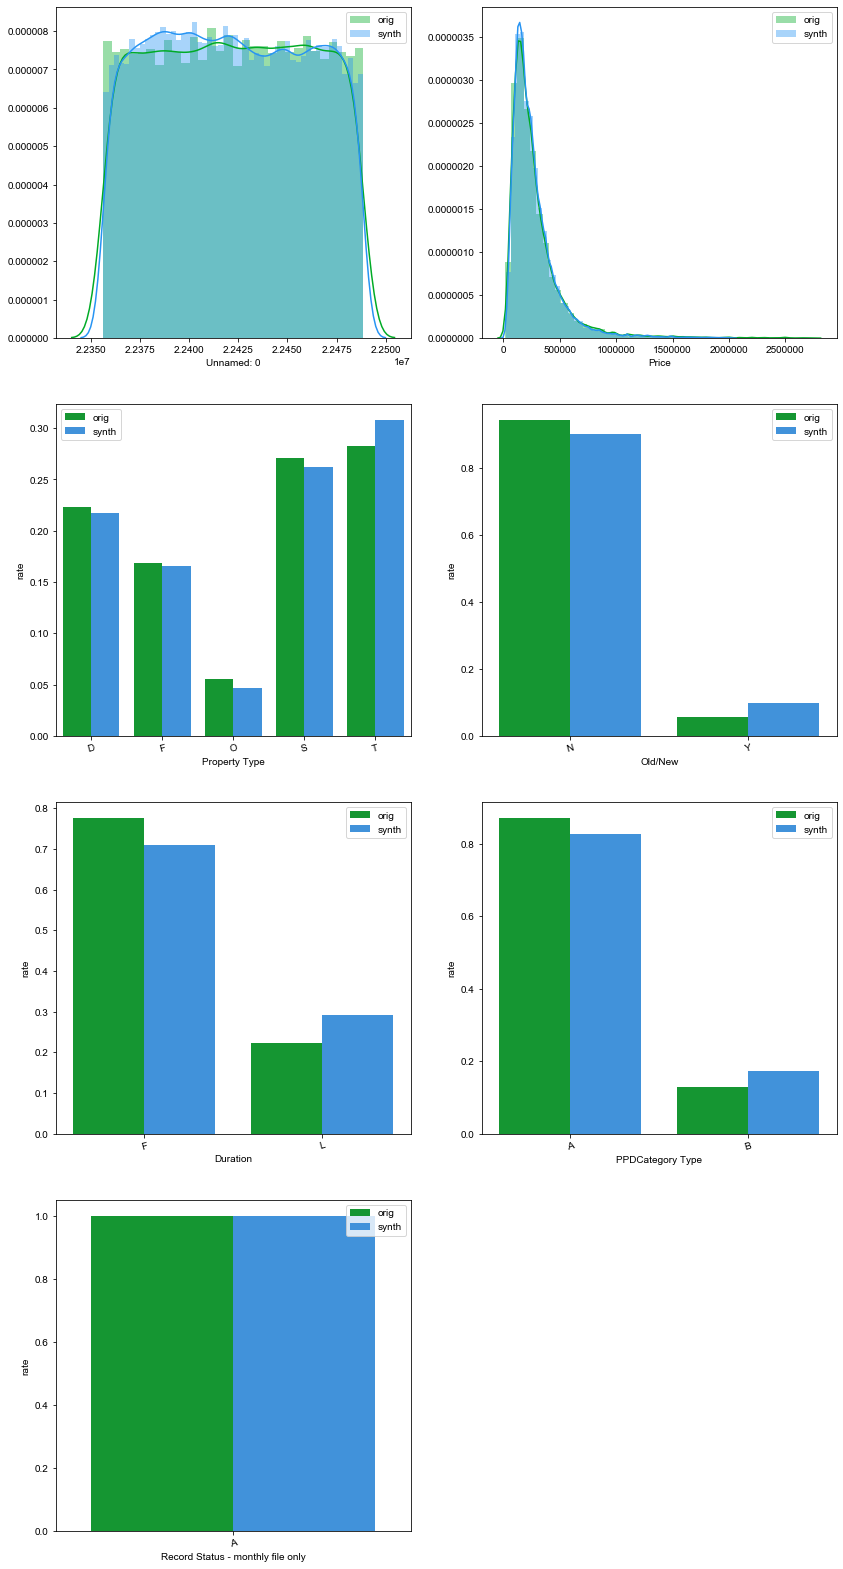

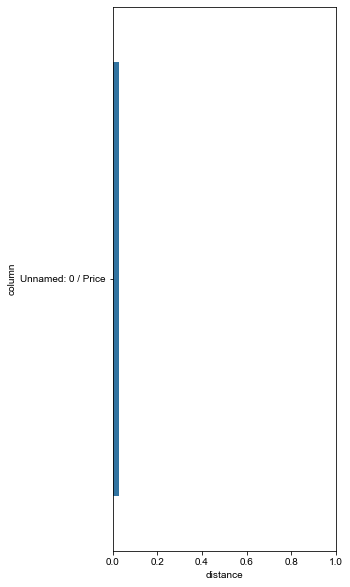

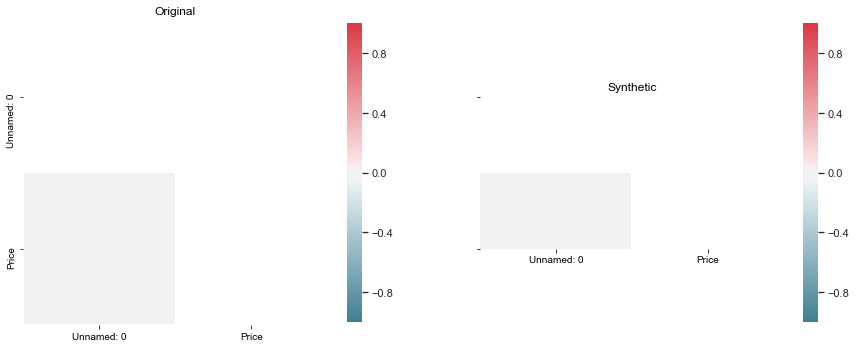

2019-10-14 15:23:09.202930 :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9
Average distance: 0.016917232021709642
Max distance: 0.036059701492537344
Average distance: 0.018516785276736454
Max distance: 0.018516785276736454


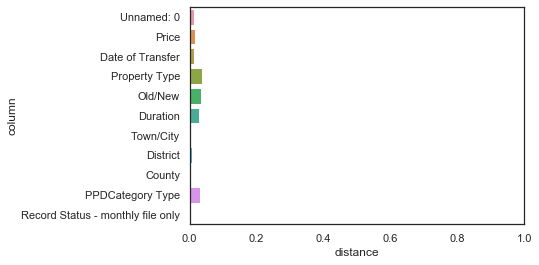

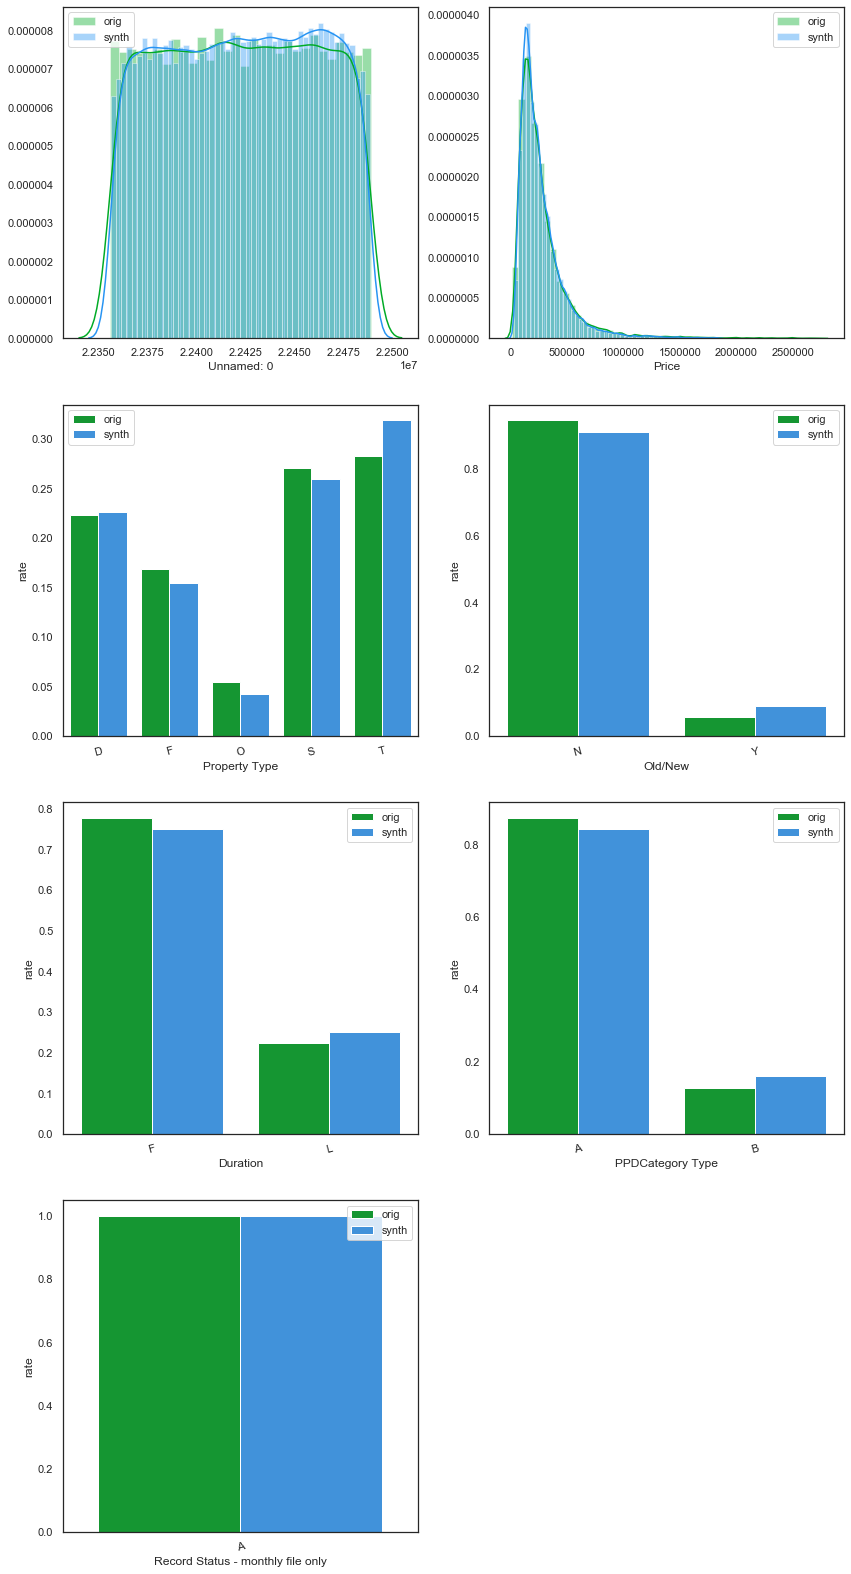

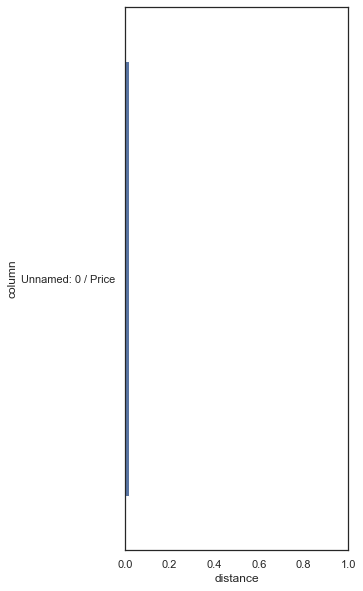

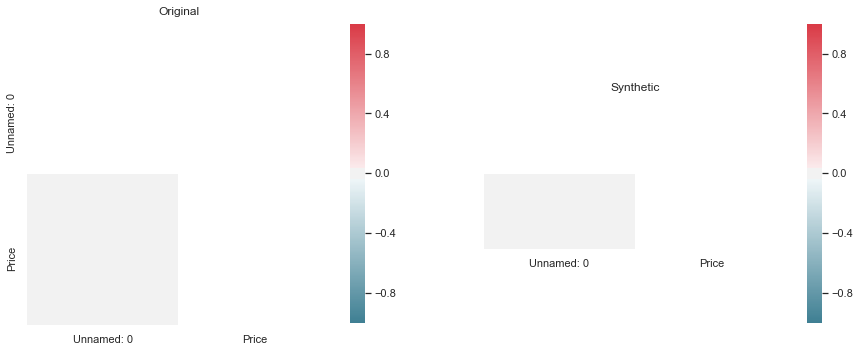

2019-10-14 15:26:28.794103 :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9
Average distance: 0.01686160108548166
Max distance: 0.038671641791044764
Average distance: 0.028506103252638845
Max distance: 0.028506103252638845


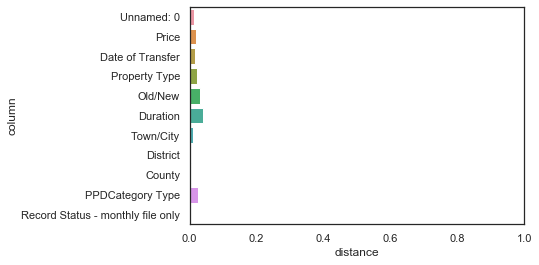

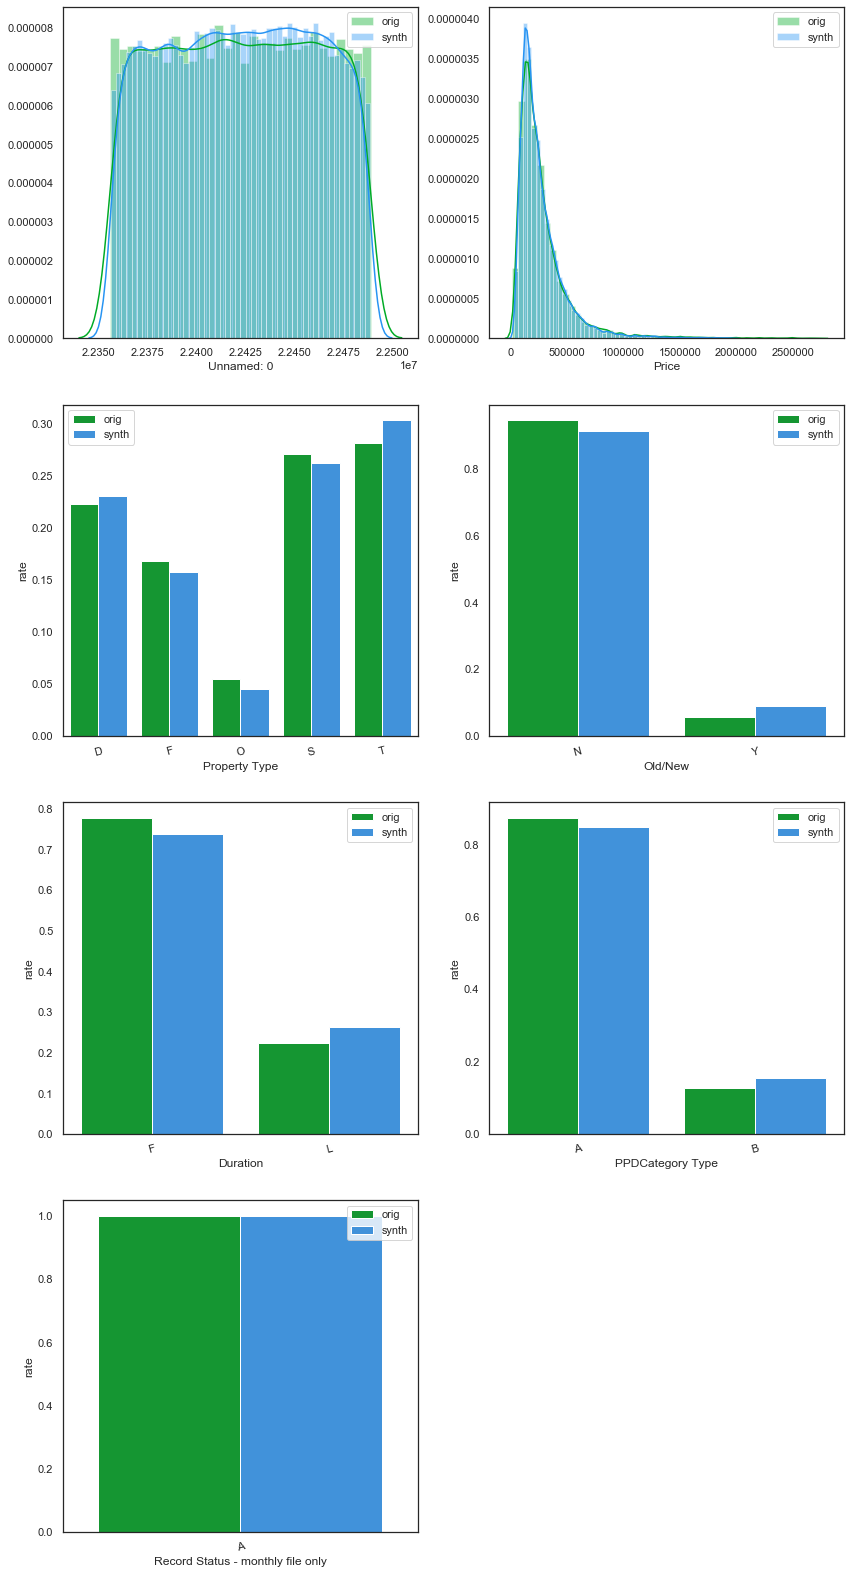

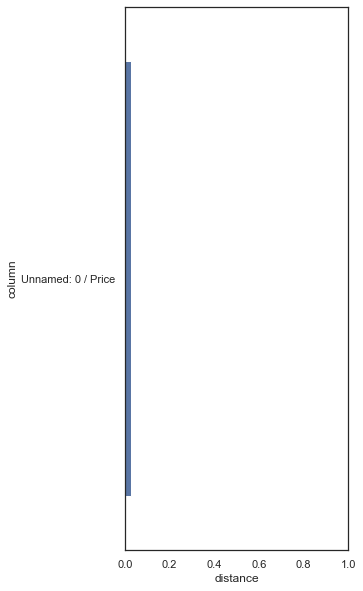

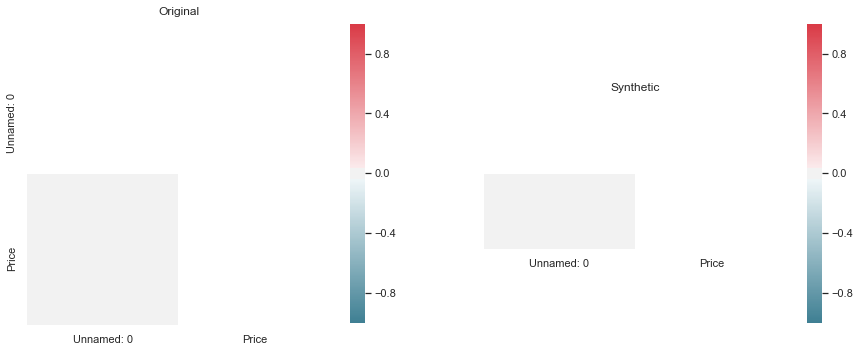

2019-10-14 15:29:45.560159 :: Experimets for dataset price_paid_household.csv finished
2019-10-14 15:29:45.560255 :: Running experimets for dataset credit.csv
2019-10-14 15:29:45.587809 :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9
Average distance: 0.050432361417959974
Max distance: 0.22984768476847683
Average distance: 0.03918374064822138
Max distance: 0.2047908381726643


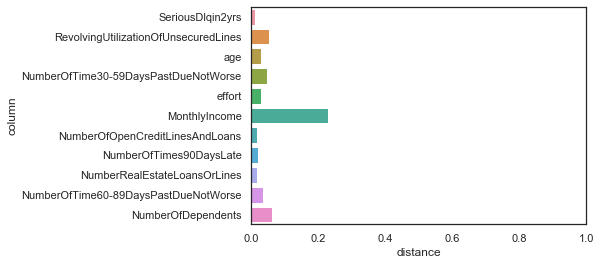

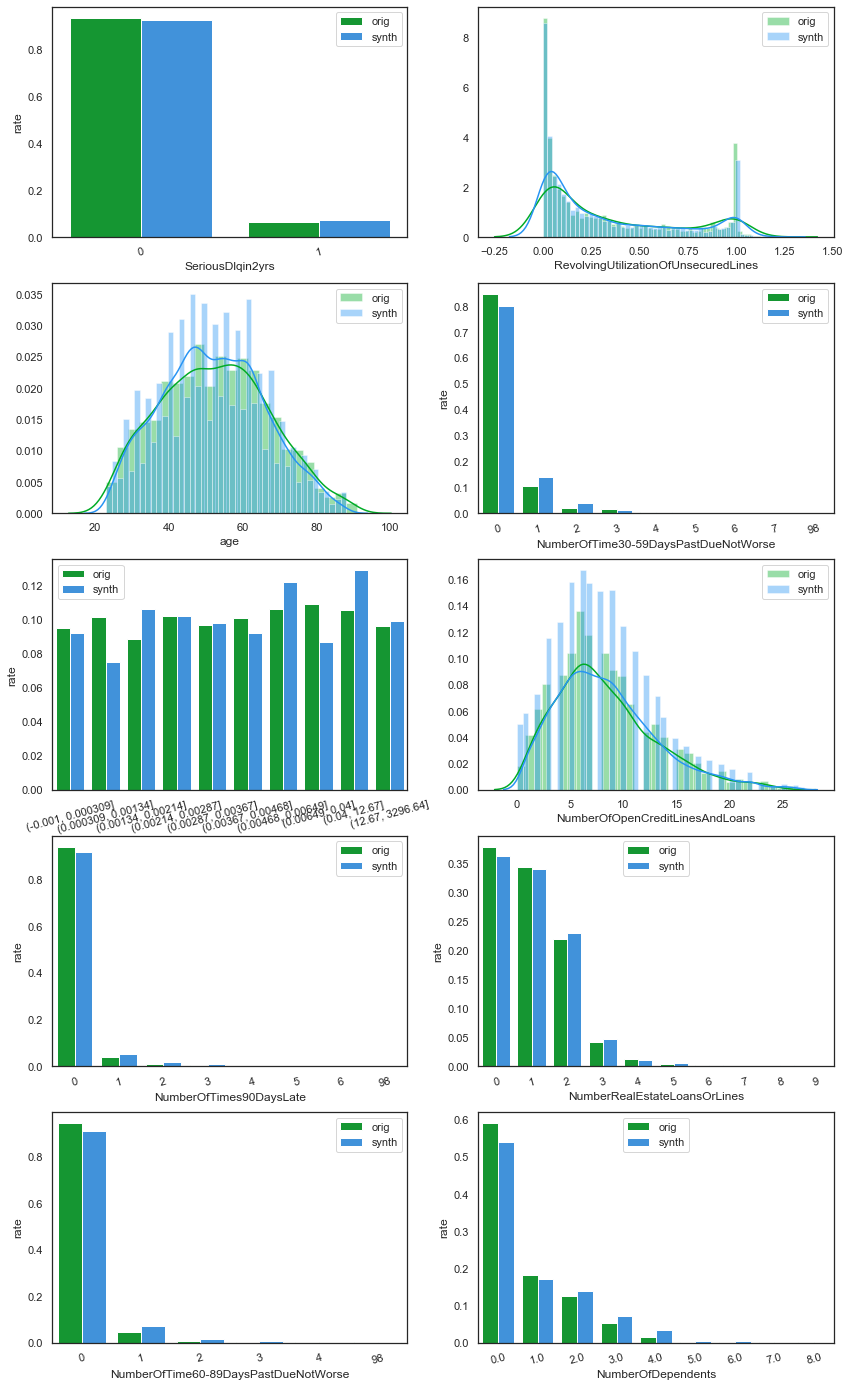

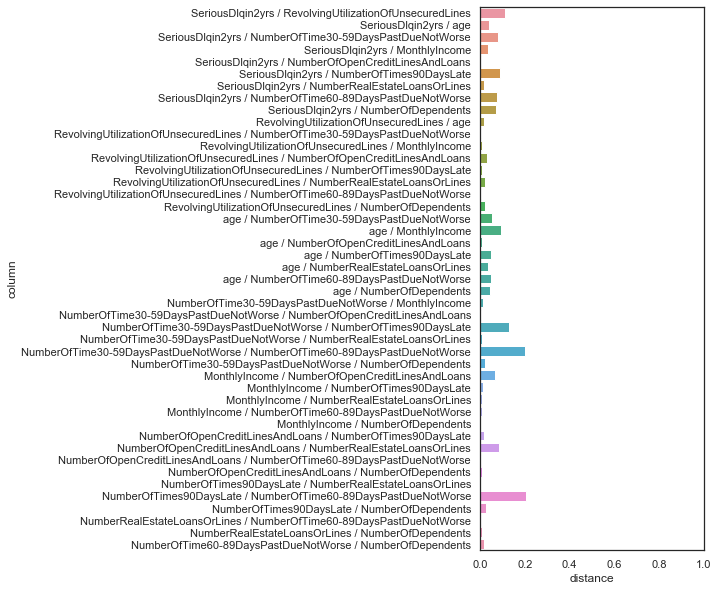

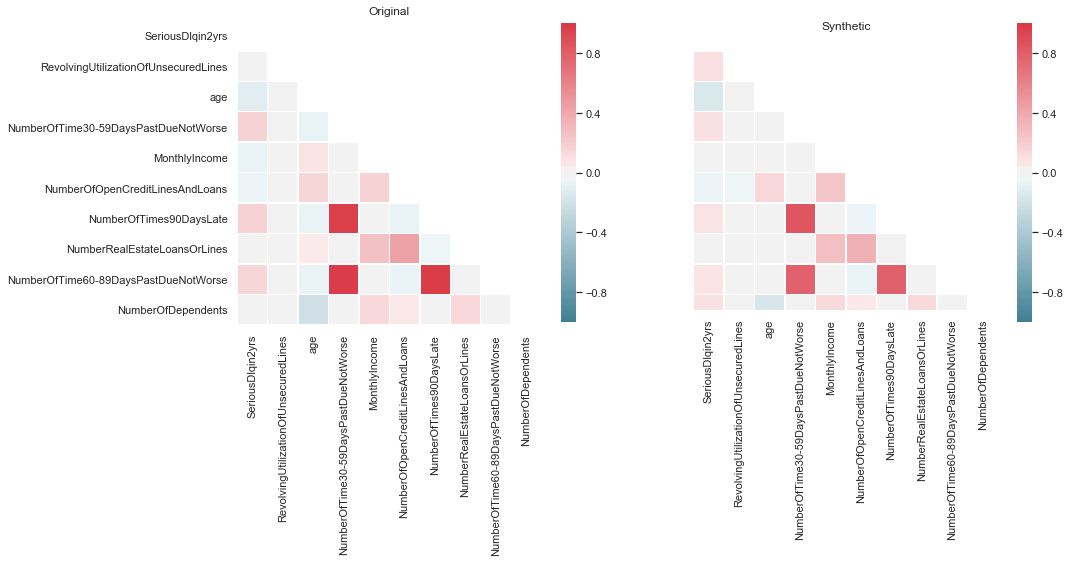

2019-10-14 15:32:54.735613 :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9
Average distance: 0.05030488503395794
Max distance: 0.2124863486348635
Average distance: 0.03284151815616888
Max distance: 0.2196220422078966


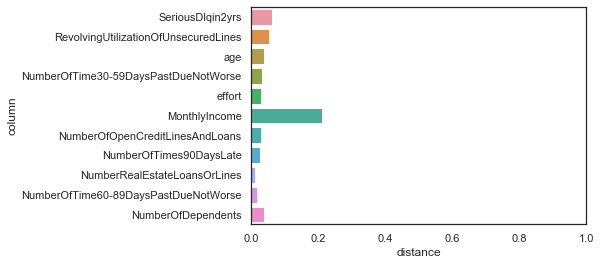

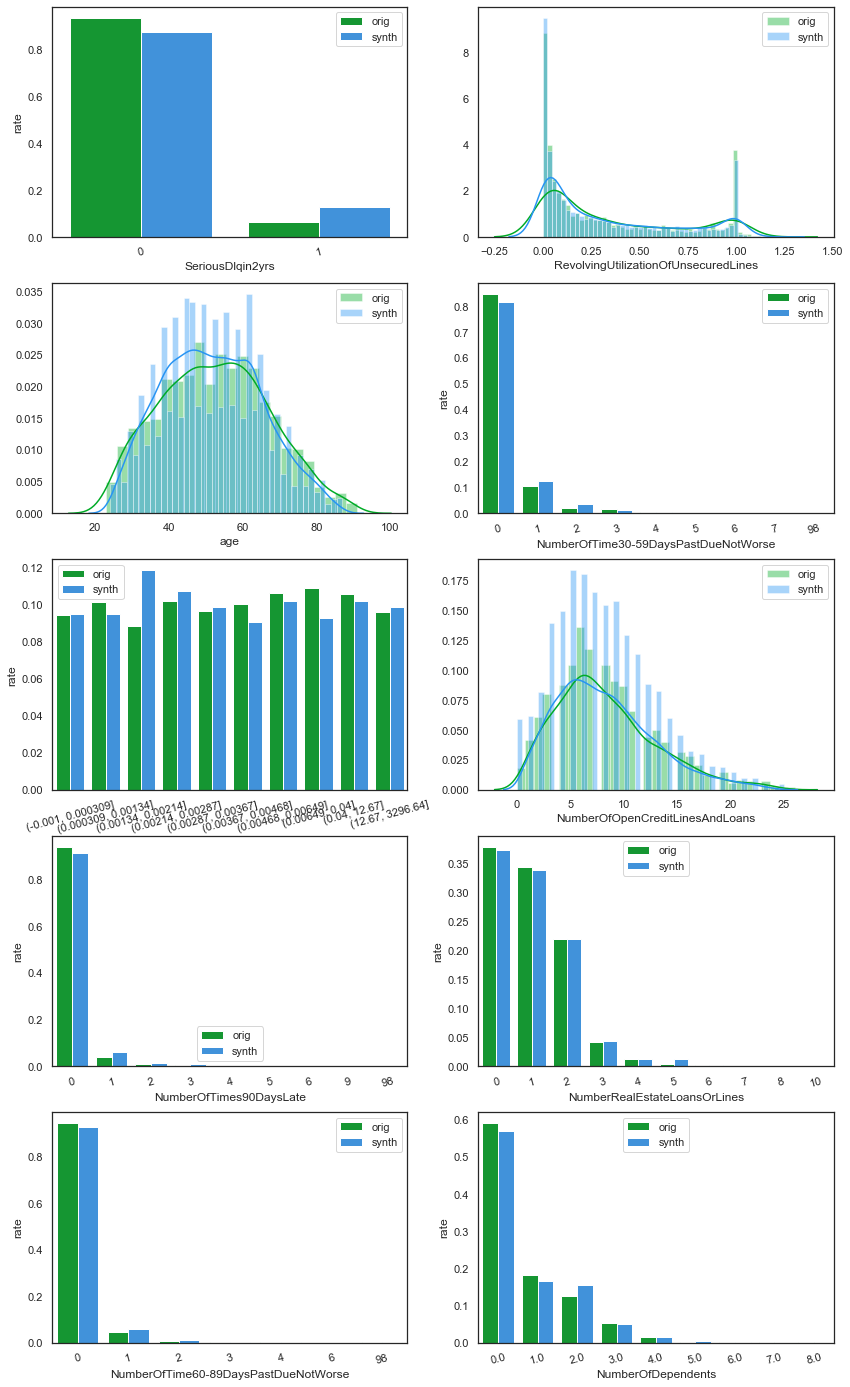

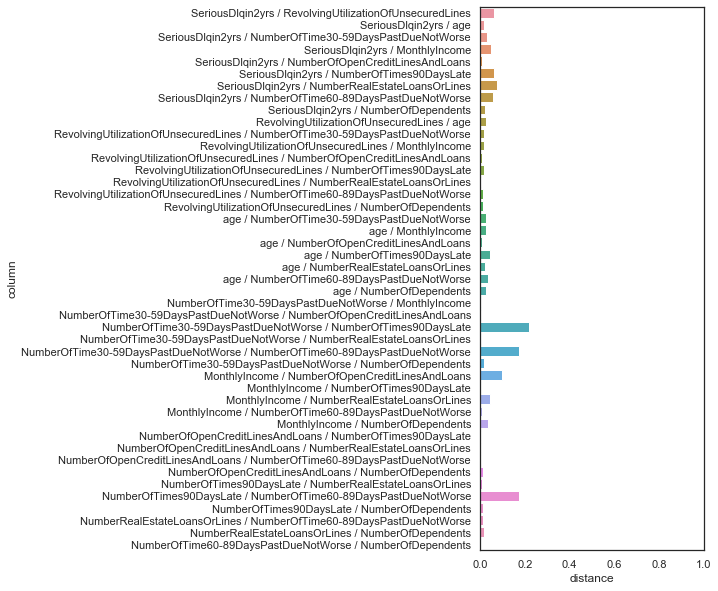

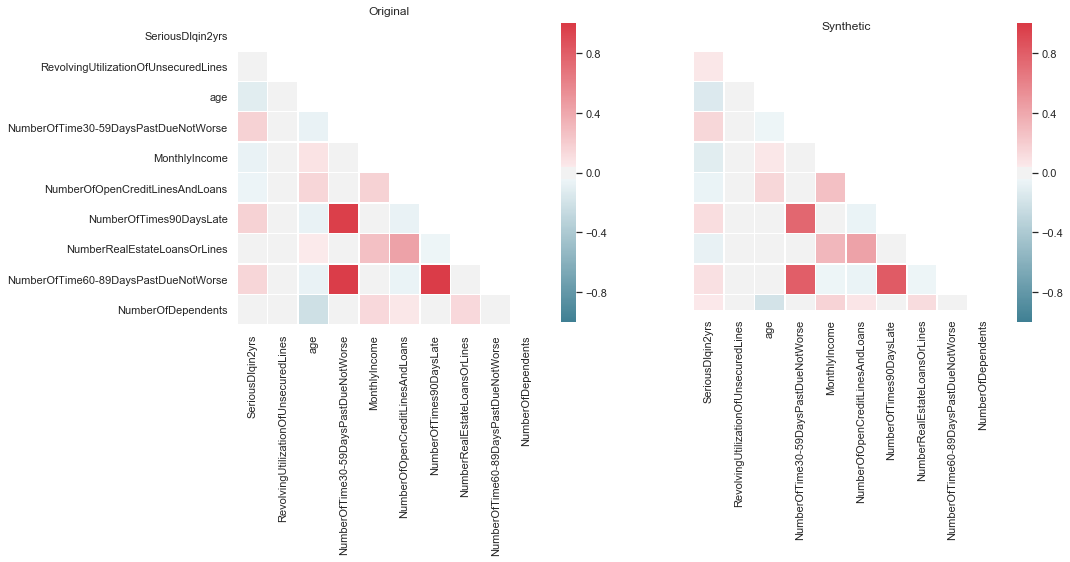

2019-10-14 15:36:05.478786 :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9
Average distance: 0.04608794515815218
Max distance: 0.20028532853285327
Average distance: 0.03732021907530027
Max distance: 0.269112331419732


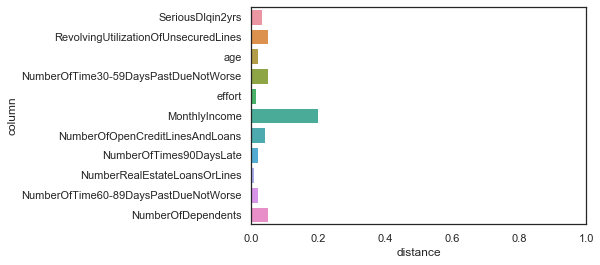

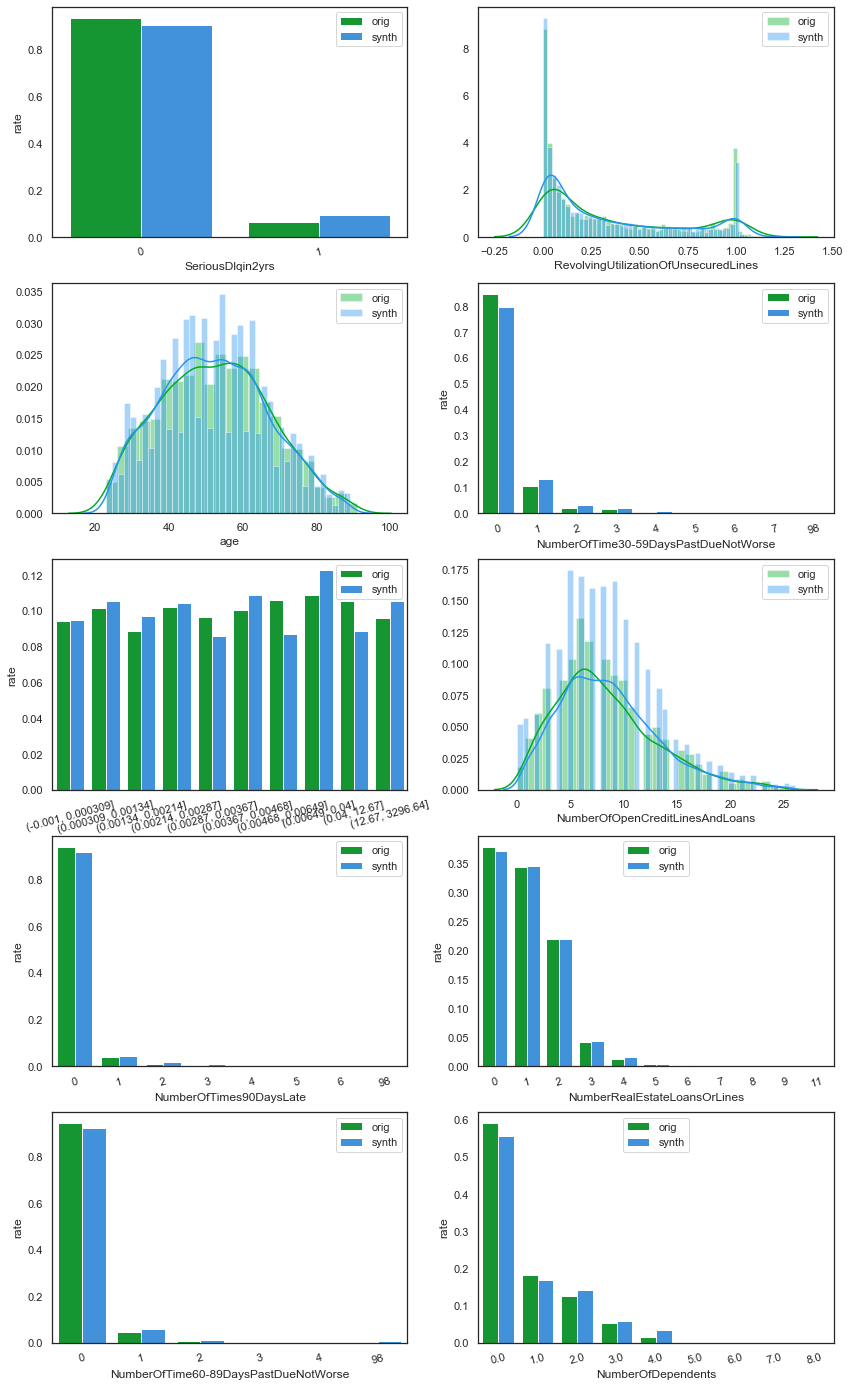

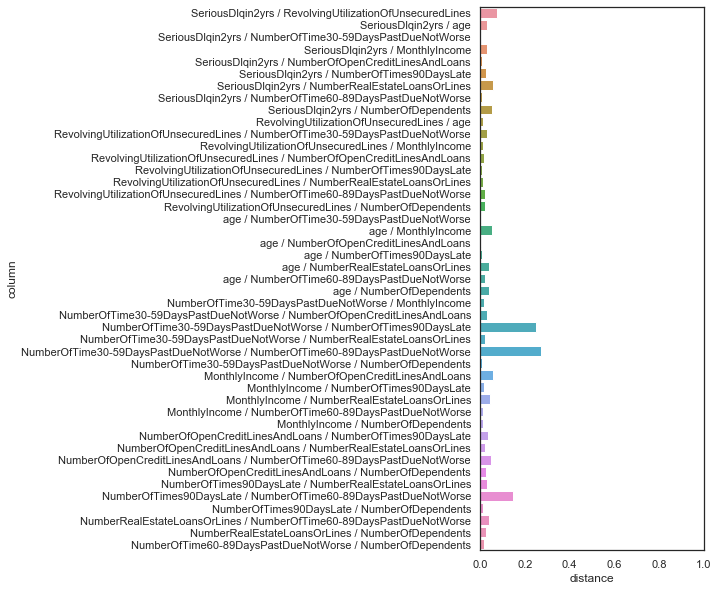

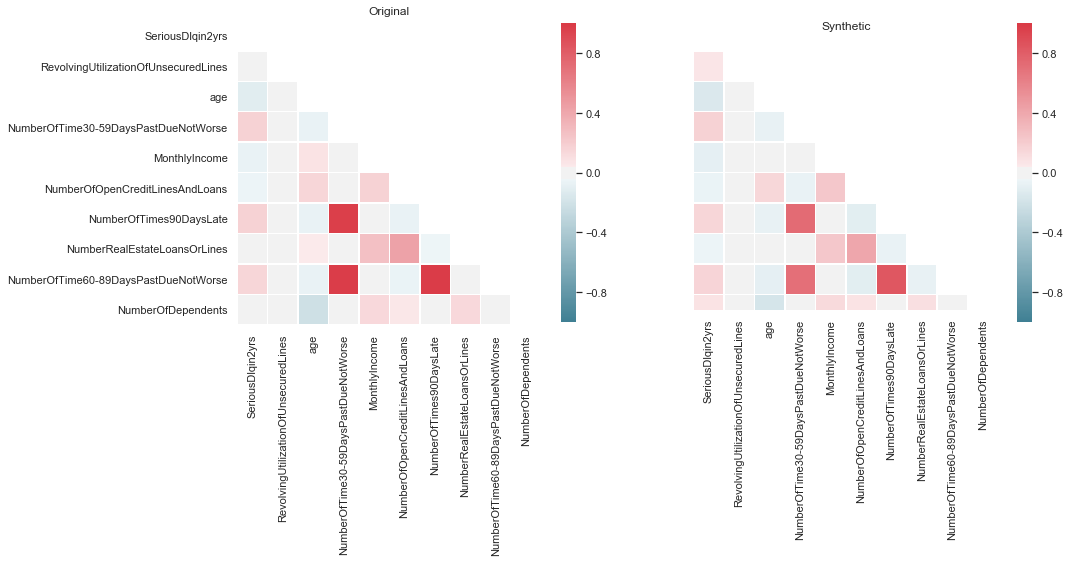

2019-10-14 15:39:48.247730 :: Experimets for dataset credit.csv finished
2019-10-14 15:39:48.247866 :: Running experimets for dataset claim_prediction.csv
2019-10-14 15:39:48.259382 :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9
Average distance: 0.03469479954487652
Max distance: 0.06346072328938268
Average distance: 0.07908652815802766
Max distance: 0.17119368245956262


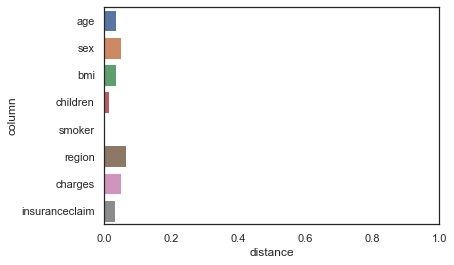

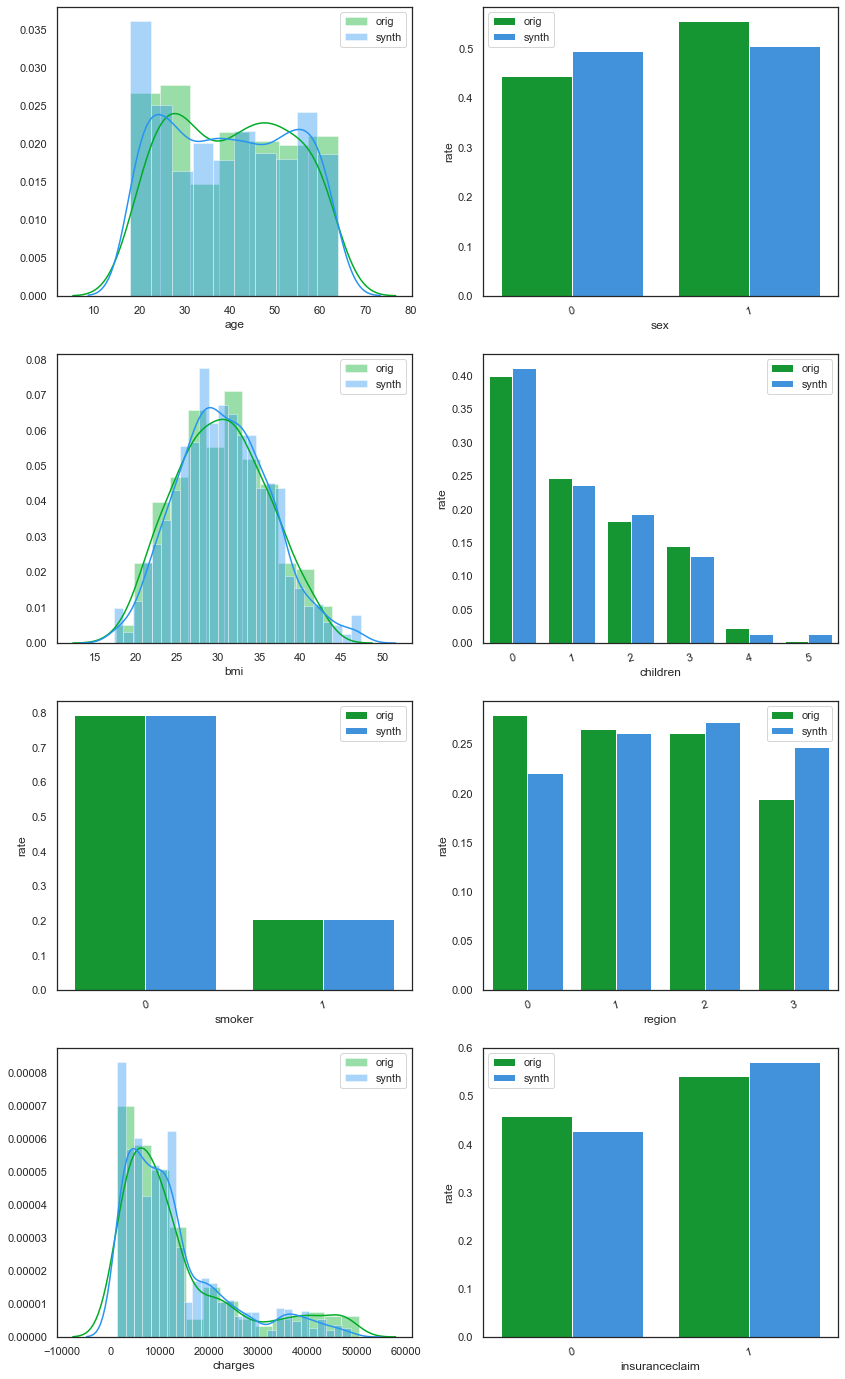

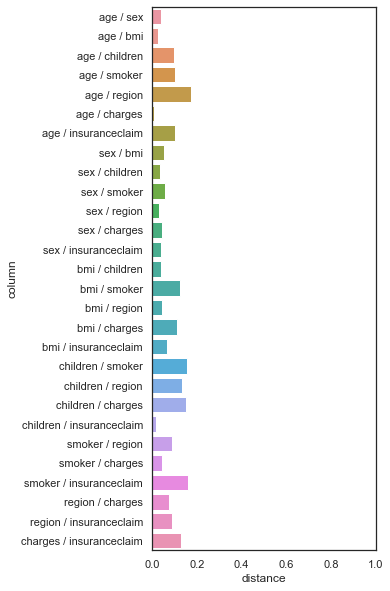

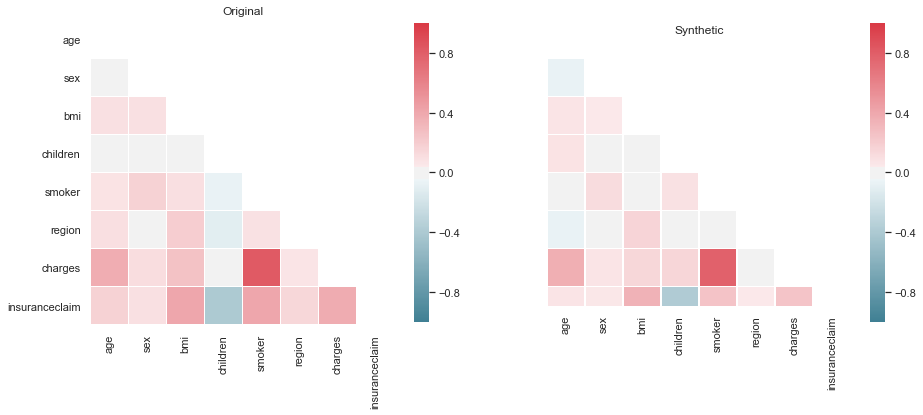

2019-10-14 15:42:43.724893 :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9
Average distance: 0.03650330187626888
Max distance: 0.05895968587555496
Average distance: 0.062418724848073134
Max distance: 0.14201188726871372


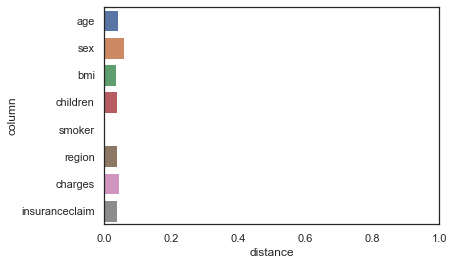

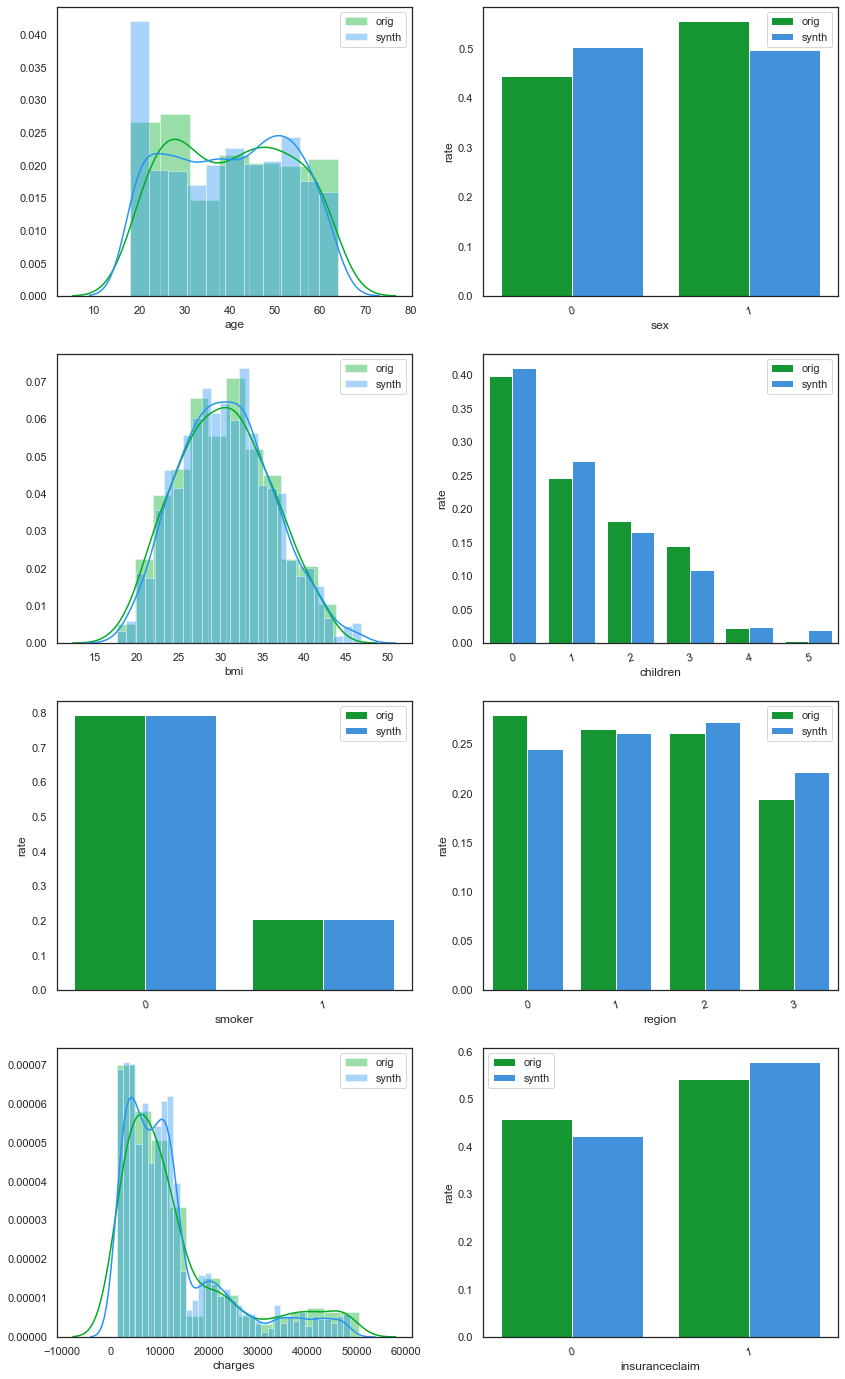

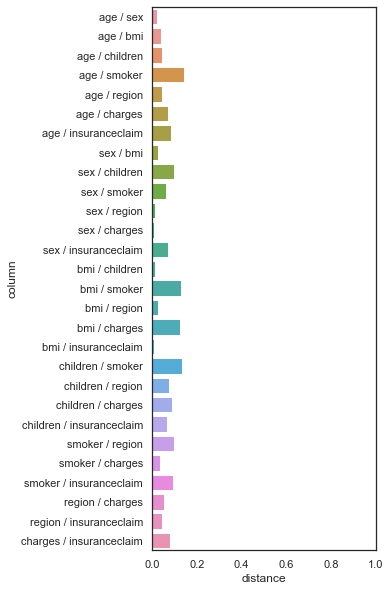

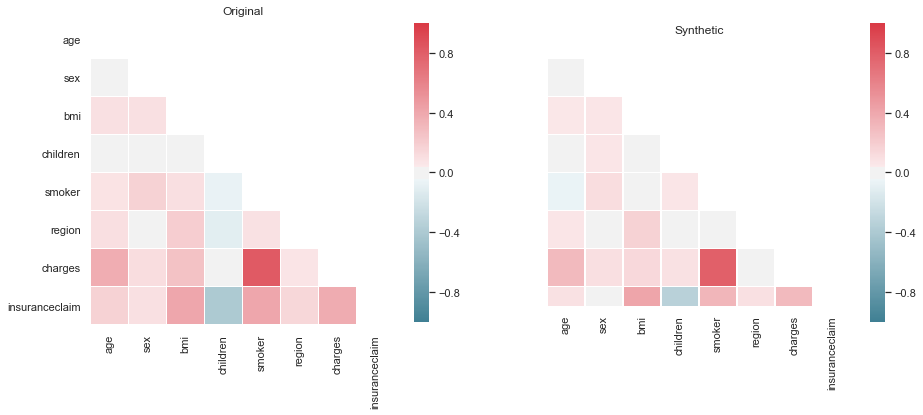

2019-10-14 15:45:32.038746 :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9
Average distance: 0.04261414340851795
Max distance: 0.06718091158556991
Average distance: 0.0582306544489613
Max distance: 0.12525213023129042


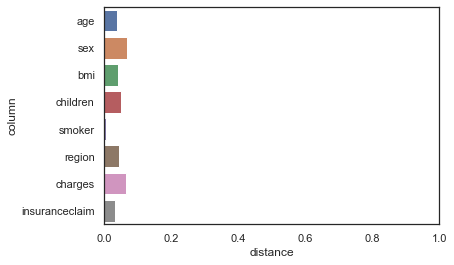

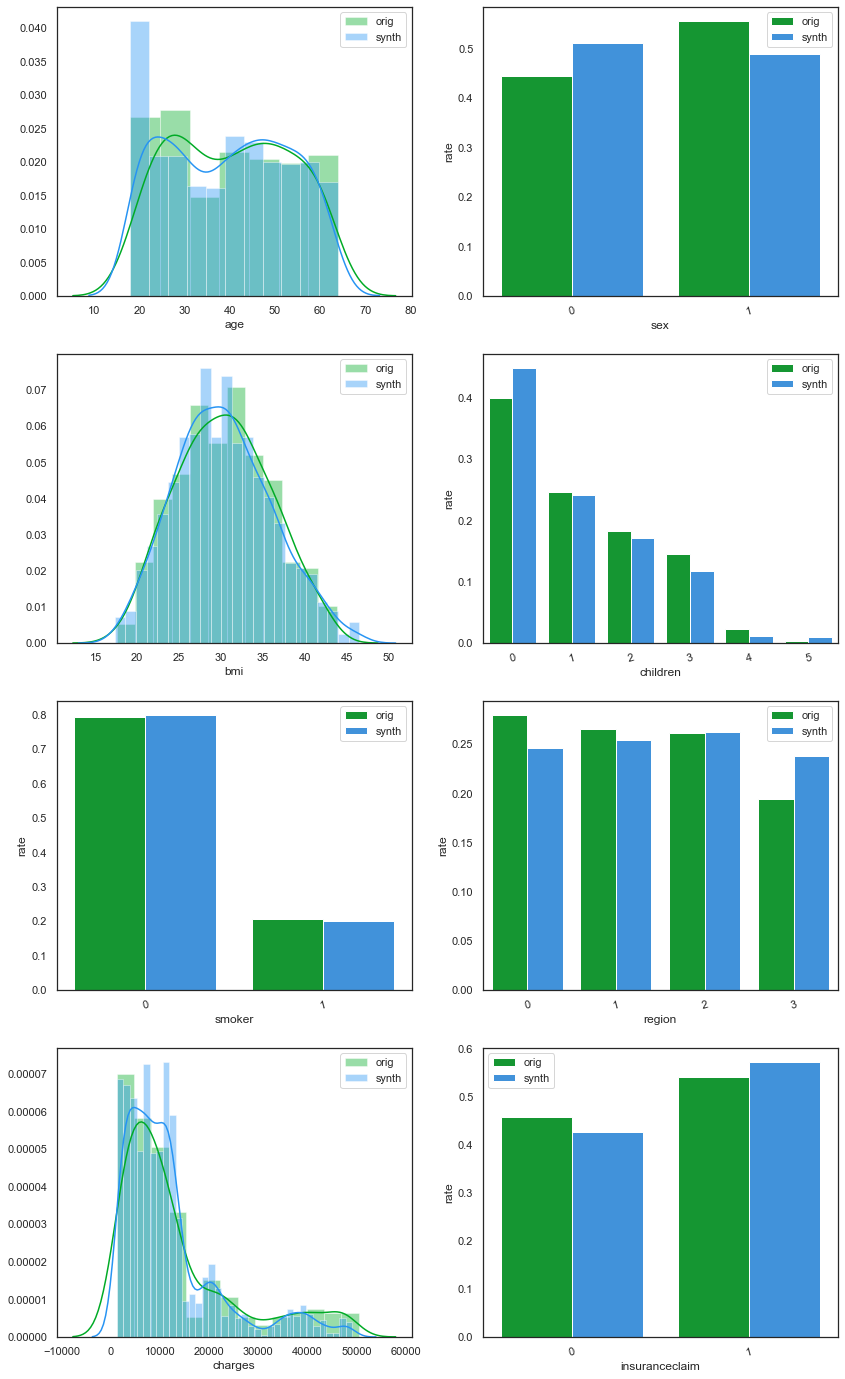

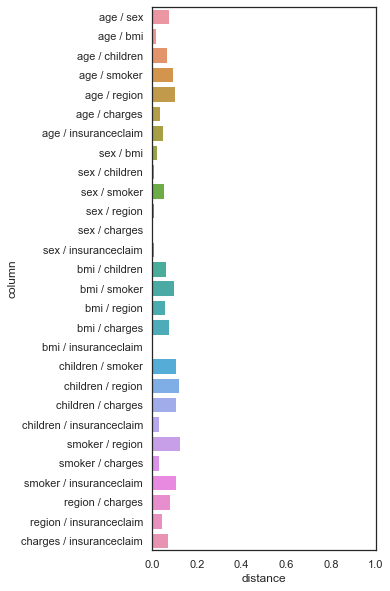

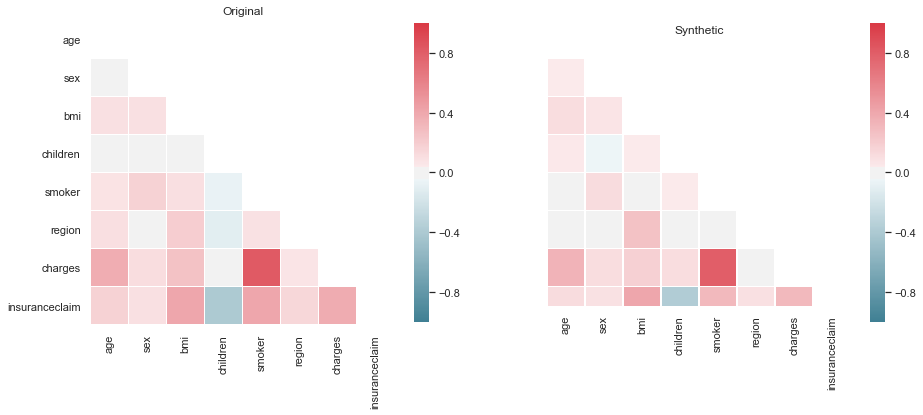

2019-10-14 15:48:24.742536 :: Experimets for dataset claim_prediction.csv finished
2019-10-14 15:48:24.743505 :: Running experimets for dataset bank-loan-status-dataset.csv
2019-10-14 15:48:25.392464 :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9


TypeError: '<' not supported between instances of 'str' and 'float'

In [6]:
num_iterations = 15000

for dataset in datasets:    
    print('{} :: Running experimets for dataset {}'. format(datetime.now(), dataset))
    
    data = pd.read_csv('../synthesized-web/project_templates/templates/' + dataset)
    train, test = train_test_split(data, test_size=0.2, random_state=0)

    print('{} :: learning_rate=3e-4, decay_steps=1000, decay_rate=0.9'.format(datetime.now()))
    with HighDimSynthesizer(df=data, learning_rate=3e-4, decay_steps=1000, decay_rate=0.9) as synthesizer:
        synthesizer.learn(df_train=data, num_iterations=num_iterations)
        synthesized = synthesizer.synthesize(num_rows=len(data))

    testing = UtilityTesting(synthesizer, train, test, synthesized)
    testing.show_distribution_distances()
    testing.show_distributions(remove_outliers=0.01)
    testing.show_corr_distances()
    testing.show_corr_matrices()
    plt.show()

    print('{} :: learning_rate=1e-4, decay_steps=1000, decay_rate=0.9'.format(datetime.now()))
    with HighDimSynthesizer(df=data, learning_rate=1e-3, decay_steps=1000, decay_rate=0.9) as synthesizer:
        synthesizer.learn(df_train=data, num_iterations=num_iterations)
        synthesized = synthesizer.synthesize(num_rows=len(data))

    testing = UtilityTesting(synthesizer, train, test, synthesized)
    testing.show_distribution_distances()
    testing.show_distributions(remove_outliers=0.01)
    testing.show_corr_distances()
    testing.show_corr_matrices()
    plt.show()

    print('{} :: learning_rate=3e-4, decay_steps=None, decay_rate=None'.format(datetime.now()))
    with HighDimSynthesizer(df=data, learning_rate=3e-4, decay_steps=None, decay_rate=None) as synthesizer:
        synthesizer.learn(df_train=data, num_iterations=num_iterations)
        synthesized = synthesizer.synthesize(num_rows=len(data))

    testing = UtilityTesting(synthesizer, train, test, synthesized)
    testing.show_distribution_distances()
    testing.show_distributions(remove_outliers=0.01)
    testing.show_corr_distances()
    testing.show_corr_matrices()
    plt.show()
    
    print('{} :: Experimets for dataset {} finished'. format(datetime.now(), dataset))
    
    print('===========================================')